In [1]:
import intdiff as id

sol = id.getTFScreeningFunction()

Solved in 7 iterations, number of nodes 100014, maximum relative residual 6.88e-04.
0
True


In [2]:
print(sol)

In [3]:
#get g(xi) for the smooth functions we just computed
g = lambda x: id.g(x,'smooth',sol)

g_approx = lambda x: id.g(x,'numeric')

print(g(1))
print(g_approx(1))

(0.6047766882313054, 9.070009777368464e-07)
(0.6881923227844454, 0.003940930821391417)


In [4]:
#try the rutherford cross section
rsol = lambda x: [1,0]
fruth = id.ft12('smooth',rsol,xmin=1,dx=0.1)

#get the f function
f = id.ft12('smooth',sol,xmin=0.001,dx=0.0005)
#f = id.ft12('smooth',sol,xmin=0.01,dx=0.005)

/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


In [5]:
print(f(1))
print(fruth(1))

0.27574499732191393
0.4348253510430519


In [6]:
#get the f function from the paper
import dataPython as dp
import numpy as np
data = dp.getXYdata('data/lindhard-f.txt')

#convert to numpy arrays
t12 = np.asarray(data['xx'])
ft12 = np.asarray(data['yy'])

In [7]:
#set up a plot 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

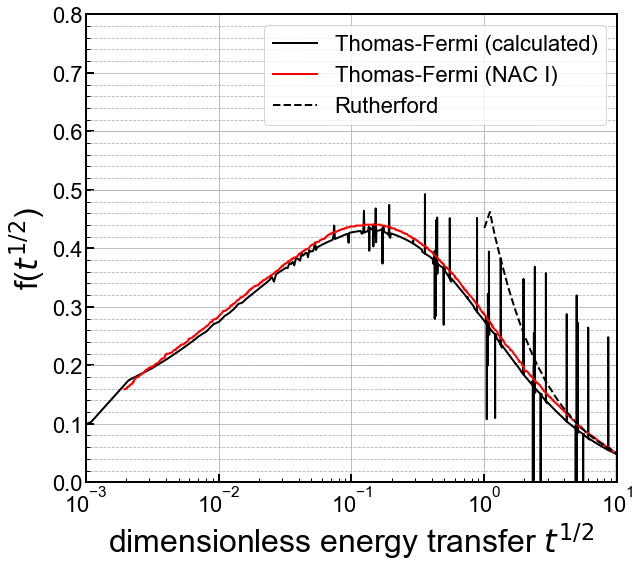

In [8]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

fv = np.vectorize(f)

dx=0.001
xmax = 10
X  = np.arange(0.0001,xmax,dx)
Xh  = np.arange(1.0,xmax,0.1)


ax1.plot (X, f(X), 'k-', label='Thomas-Fermi (calculated)')
ax1.plot (t12, ft12, 'r-', label='Thomas-Fermi (NAC I)')
ax1.plot (Xh, fruth(Xh), 'k--', label='Rutherford')

#ax1.plot (X, tau_3v(X), 'g-', label='$\tau$$_3$')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('linear')
ax1.set_xscale('log')
ax1.set_xlim(0.001, xmax)
ax1.set_ylim(0,0.8)
ax1.set_xlabel('dimensionless energy transfer $t^{1/2}$',**axis_font)
ax1.set_ylabel('f($t^{1/2}$)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/f_TF_smooth.png')
plt.show()